【問題1】K-meansクラスの作成

In [1]:
class ScratchKMeans():
    
    def __init__(self,num_iter, k, random_state=False):
        self.num_iter = num_iter
        self.k = k
        self.random_state = random_state
        self.centroids = 0
        self.y = 0
        self.norm_array = 0
        
    def fit(self, X):
        # indexをランダムにk個選ぶ初期の重心
        if self.random_state:
            seed = 2
            np.random.seed(seed)
            
        index_array = np.arange(X.shape[0])
        # shuffle
        np.random.shuffle(index_array)
        random_index = index_array
        random_k_index = random_index[:self.k] #重心の初期値
        
        
        # 各重心との距離を算出
        norm_array = None
        self.centroids = X[random_k_index]
        self.class_index = np.zeros(self.k)[:,np.newaxis]
        
         # 各重心との距離を算出
        norm_array = None
        self.centroids = X[random_k_index]
        class_index = np.zeros(self.k)[:,np.newaxis]       
        for _ in range(self.num_iter):
            norm_array = None
            
            for i in range(self.k):
                linalg_norm = np.linalg.norm((X-self.centroids[i]), axis=1)[:,np.newaxis]
                if norm_array is None:
                    norm_array = linalg_norm
                else: 
                    norm_array = np.concatenate([norm_array, linalg_norm], axis=1)
            

            y = np.argmin(norm_array, axis=1)
            sse = np.zeros(self.k)[:,np.newaxis]
            
            for i in range(self.k):
                class_index = np.where([y==i])[1]
                mean = np.mean(X[class_index], axis=0)
                self.centroids[i] = (mean)
                sse[i] = np.sum((X[class_index] - mean)**2)
            
           
        self.sse = np.sum(sse)
                
        self.y = y
    
    def elbow(self,X):
        sse_list = []
        for n in range(1, self.k+1):
            self.k = n
            self.fit(X)
            sse_list.append(self.sse)
            
        plt.plot([n for n in range(1,self.k+1)], sse_list)
        plt.title('elbow_graph')
        plt.xlabel('k')
        plt.ylabel('SSE')
        

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [3]:
km = ScratchKMeans(num_iter=20, k=5)
km.fit(X)

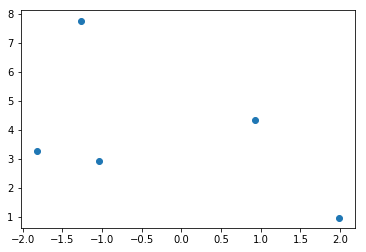

In [4]:
plt.scatter(km.centroids[:,0], km.centroids[:,1])

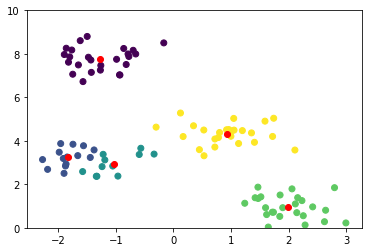

In [5]:
plt.ylim(0,10)
plt.scatter(X[:,0], X[:,1], c=km.y)
plt.scatter(km.centroids[:,0], km.centroids[:,1], c='r')

【問題2】エルボー法の実装

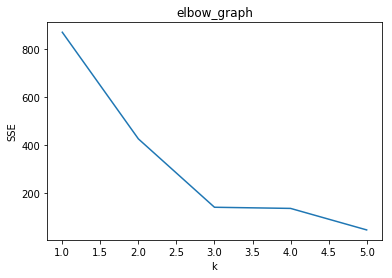

In [6]:
km.elbow(X)

In [7]:
df = pd.read_csv('../ml-scratch/utils/Wholesale customers data.csv')
data = df.iloc[:, 2:] # 金額に関する特徴量

In [8]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
data = data.values

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


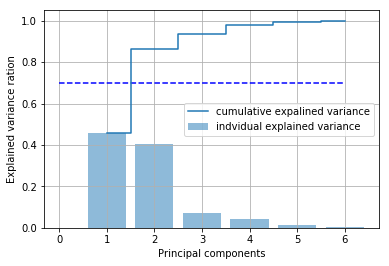

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)# n_components=Noneでデータの次元数
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_ #分散の割合n_components=Noneですべてのコンポーネントが格納され、比率の合計は1.0
cum_var_exp = np.cumsum(var_exp) # 累積和
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='indvidual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ration')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6, "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [11]:
pca_data = pca.transform(data)
data = pca_data[:,:2]
data.shape

(440, 2)

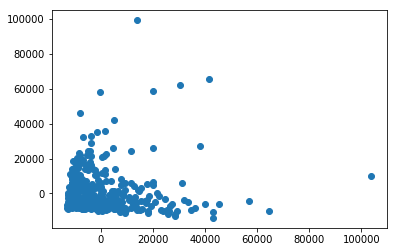

In [12]:
plt.scatter(data[:,0], data[:,1])

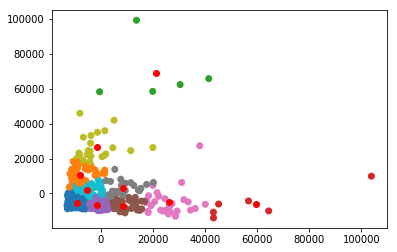

In [13]:
km = ScratchKMeans(num_iter=20, k=10, random_state=True)
km.fit(data)
plt.scatter(data[:,0], data[:,1], c=km.y, cmap='tab10')
plt.scatter(km.centroids[:,0], km.centroids[:,1], c='r')

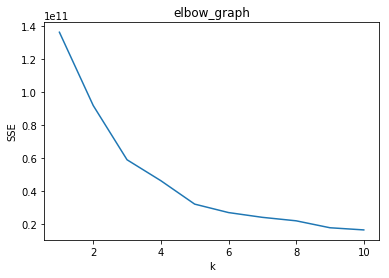

In [14]:
km.elbow(data)

【問題4】クラスタ数kの選択

PCA後のデータは第1主成分と第2主成分を用いているので(主成分どうしは直交する)散布図上でy=xに関して対称なのではないかと考える
そのためkは奇数の方が好ましく、elbow法の図から5が適切なのではないかと考えた

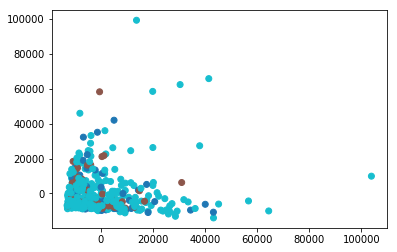

In [15]:
region = df.iloc[:,1].values
channel = df.iloc[:,0].values
plt.scatter(data[:,0], data[:,1], c=region, cmap='tab10')

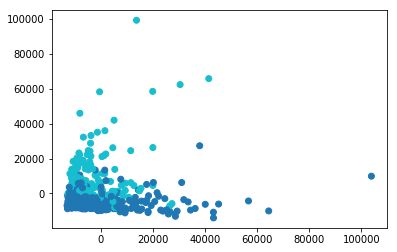

In [16]:
plt.scatter(data[:,0], data[:,1], c=channel, cmap='tab10')

【問題5】既知のグループとの比較

channelはどのchannelかでどの主成分を使用しているかが綺麗に分割されており、地域はほとんど分離されていない
クラスタはよくわからないが分割されている

【問題6】卸売業者にとって有益な情報

In [17]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [18]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [23]:
df['Principal component1'] = data[:,0]
df['Principal component2'] = data[:,1]
corr = df.corr()

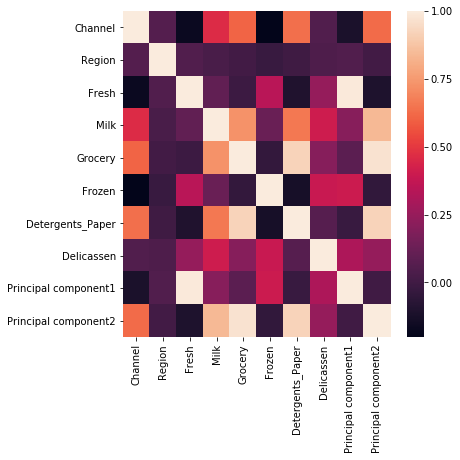

In [25]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr) # 相関係数行列

In [30]:
df.groupby(['Channel']).mean() # channel毎の平均

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Principal component1,Principal component2
Channel,,,,,,,,,
1,2.510067,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,1021.413562,-5205.429178
2,2.612676,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,-2143.529869,10924.069684


#### groupbyを使うことでchannel毎の平均を出すことができ、MilkとDetergents_Paperのように売れる商品に大きな差があることがわかった. 


【問題9】教師なし学習と教師あり学習

教師あり学習

望む方向(答え)に近いものが善、遠いものが悪となるので、その答えに近くなるように特徴を抽出する。メリットは目標が明確



教師なし学習

データの本質的なパターンを抽出するもので、望む方向と近いかどうかは関係ない
メリットは教師ラベルによるコストが低い